In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [74]:
df = pd.read_csv('./news.csv')
df.head()

,article_no,title,text,authenticity
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [75]:
# get the authenticity for each 
labels = df.authenticity.head()
labels

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: authenticity, dtype: object

In [76]:
# drop the article number and title as they are not required fields
df = df.drop(["article_no","title"], axis=1)


In [77]:
df.head()

,text,authenticity
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


Converting Text into Vectors

In [78]:
# split the data set into train and test 
x_train,x_test,y_train,y_test=train_test_split(df['text'], df['authenticity'], test_size=0.3, random_state=7)

In [79]:
# Initialize a TfidfVectorizer
vectorizer=TfidfVectorizer()

x_vector_train=vectorizer.fit_transform(x_train) 
x_vector_test=vectorizer.transform(x_test)

# Initialize a PassiveAggressiveClassifier
pass_agg=PassiveAggressiveClassifier(max_iter=50)
pass_agg.fit(x_vector_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

Model training, Evaluation, and Prediction

In [80]:
# Predict on the test set and calculate accuracy
pred=pass_agg.predict(x_vector_test)
score=accuracy_score(y_test,pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


In [81]:
logistic_model = LogisticRegression()
logistic_model.fit(x_vector_train, y_train)
# calculate accuracy
train_score = accuracy_score(y_train, logistic_model.predict(x_vector_train))
test_score = accuracy_score(y_test, logistic_model.predict(x_vector_test))
print(f'Accuracy for Logistics training model: {round(train_score*100,2)}%')
print(f'Accuracy for Logistics test model: {round(test_score*100,2)}%')

Accuracy for Logistics training model: 95.31%
Accuracy for Logistics test model: 91.22%


In [82]:
decision_model = DecisionTreeClassifier()
decision_model.fit(x_vector_train, y_train)
  
# testing the model
decision_train_score = accuracy_score(y_train, decision_model.predict(x_vector_train))
decision_test_score = accuracy_score(y_test, decision_model.predict(x_vector_test))
print(f'Accuracy for Decisions training model: {round(decision_train_score*100,2)}%')
print(f'Accuracy for Decisions test model: {round(decision_test_score*100,2)}%')

Accuracy for Decisions training model: 100.0%
Accuracy for Decisions test model: 80.12%


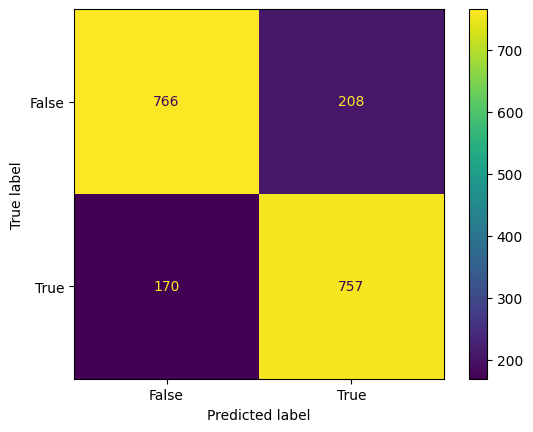

In [83]:
# Confusion matrix of results from Decision Tree classification 
conf_matrix = metrics.confusion_matrix(y_test, decision_model.predict(x_vector_test))
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()